In [1]:
#Importing Libraries

In [2]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [3]:
#Extract Filenames from Folder

In [4]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))

In [5]:
len(filenames)

5859

In [6]:
#Importing ResNet50 Model and Cofiguration

In [7]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [8]:
#Extracting Fetaures from Image

In [9]:
img = image.load_img('9687.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


array([0.00447462, 0.00914892, 0.        , ..., 0.01618348, 0.02476568,
       0.09050825], dtype=float32)

In [10]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [11]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


array([0.        , 0.01761619, 0.00171607, ..., 0.0124724 , 0.02726402,
       0.06899223], dtype=float32)

In [12]:
image_features = []
for file in filenames[0:150]:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

[array([0.        , 0.01761619, 0.00171607, ..., 0.0124724 , 0.02726402,
        0.06899223], dtype=float32),
 array([0.        , 0.03648943, 0.        , ..., 0.00997914, 0.02375535,
        0.04649904], dtype=float32),
 array([0.        , 0.03642144, 0.00710437, ..., 0.00140772, 0.        ,
        0.05435037], dtype=float32),
 array([0.00232166, 0.0503055 , 0.00747743, ..., 0.00346686, 0.0339102 ,
        0.04565743], dtype=float32),
 array([0.00306834, 0.06240453, 0.        , ..., 0.00170625, 0.02032885,
        0.05833262], dtype=float32),
 array([0.        , 0.1046912 , 0.00198092, ..., 0.        , 0.03033769,
        0.02712848], dtype=float32),
 array([0.        , 0.1243846 , 0.01465612, ..., 0.00289706, 0.0405516 ,
        0.06534589], dtype=float32),
 array([0.        , 0.09169205, 0.01569911, ..., 0.        , 0.00503581,
        0.0456004 ], dtype=float32),
 array([0.        , 0.09545276, 0.01153319, ..., 0.00073008, 0.04513266,
        0.07661068], dtype=float32),
 array([0.

In [13]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [14]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [15]:
#Loading Pickle Files

In [16]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [17]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [18]:
np.array(Image_features).shape

(50, 2048)

In [19]:
#Finidng Simialar Images

In [20]:
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean')

In [21]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean')

In [22]:
input_image = extract_features_from_images('9687.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


In [23]:
distance,indices = neighbors.kneighbors([input_image])

In [24]:
indices[0]

array([15, 42, 46, 44, 49], dtype=int64)

In [25]:
from IPython.display import Image

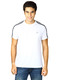

In [26]:
Image('9687.jpg')

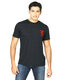

In [27]:
Image(filenames[indices[0][1]])

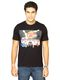

In [28]:
Image(filenames[indices[0][2]])

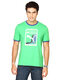

In [29]:
Image(filenames[indices[0][3]])

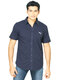

In [30]:
Image(filenames[indices[0][4]])